# Wholesale Customers Analysis (Download Data)

Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their
stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties
of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

# Import basic libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

## First step is to import the data and do the exploratory data analysis

In [2]:
df=pd.read_csv('Wholesale+Customers+Data.csv')


In [3]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


## Check for the null values 

In [6]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [7]:
df.dtypes

Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

In [8]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [9]:
df['Total expenses']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df["Delicatessen"]

In [10]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total expenses
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [11]:
df_channel=df.groupby('Channel')['Total expenses'].sum().reset_index()

In [12]:
df_channel

,Channel,Total expenses
0,Hotel,7999569
1,Retail,6619931


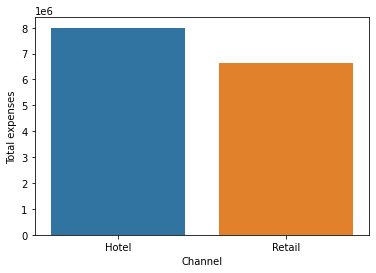

In [13]:
sns.barplot(x=df_channel['Channel'],y=df_channel['Total expenses']);

In [14]:
df_region=df.groupby('Region')['Total expenses'].sum().reset_index()

In [15]:
df_region

,Region,Total expenses
0,Lisbon,2386813
1,Oporto,1555088
2,Other,10677599


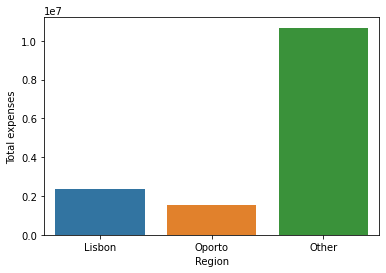

In [16]:
sns.barplot(x=df_region['Region'],y=df_region['Total expenses']);

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? 
Provide a detailed justification for your answer.

In [17]:
df_variety=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df["Delicatessen"].sum()
df_variety

0      703717
1      702433
2      699709
3      696536
4      711858
        ...  
435    742041
436    716969
437    746483
438    686652
439    678480
Length: 440, dtype: int64

In [18]:
df_channel=df.groupby('Channel').sum().reset_index()

In [19]:
df_channel

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total expenses
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


In [20]:
new_index=['Hotel','Retail']
df_channel1=df.groupby("Channel").sum().reset_index()
df_channel1

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total expenses
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


In [21]:
df_channel2=df_channel1.T
df_channel2

,0,1
Channel,Hotel,Retail
Buyer/Spender,71034,25986
Fresh,4015717,1264414
Milk,1028614,1521743
Grocery,1180717,2317845
Frozen,1116979,234671
Detergents_Paper,235587,1032270
Delicatessen,421955,248988
Total expenses,7999569,6619931


In [22]:
df_channel2.columns=new_index
df_channel2

,Hotel,Retail
Channel,Hotel,Retail
Buyer/Spender,71034,25986
Fresh,4015717,1264414
Milk,1028614,1521743
Grocery,1180717,2317845
Frozen,1116979,234671
Detergents_Paper,235587,1032270
Delicatessen,421955,248988
Total expenses,7999569,6619931


In [23]:
df_channel3 = df_channel2.iloc[2:8]
df_channel3

,Hotel,Retail
Fresh,4015717,1264414
Milk,1028614,1521743
Grocery,1180717,2317845
Frozen,1116979,234671
Detergents_Paper,235587,1032270
Delicatessen,421955,248988


In [24]:
df_channel4= df_channel3.reset_index()
df_channel4

,index,Hotel,Retail
0,Fresh,4015717,1264414
1,Milk,1028614,1521743
2,Grocery,1180717,2317845
3,Frozen,1116979,234671
4,Detergents_Paper,235587,1032270
5,Delicatessen,421955,248988


In [25]:
df_channel4.rename(columns={'index': 'Items'}, inplace=True)
df_channel4

,Items,Hotel,Retail
0,Fresh,4015717,1264414
1,Milk,1028614,1521743
2,Grocery,1180717,2317845
3,Frozen,1116979,234671
4,Detergents_Paper,235587,1032270
5,Delicatessen,421955,248988


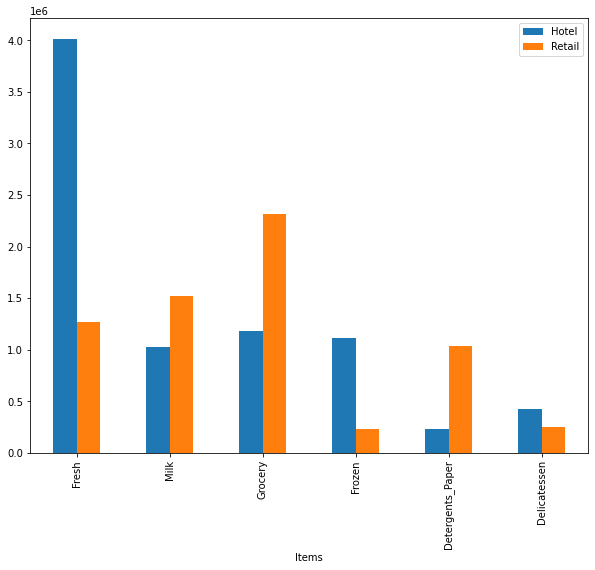

In [26]:
df_channel4.plot(x="Items", y=["Hotel", "Retail"], kind="bar",figsize=(10,8))
plt.show()

In [27]:
df_channel4['Hotel'].sum()

7999569

In [28]:
df_channel4['Retail'].sum()

6619931

In [29]:
df_channel

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total expenses
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


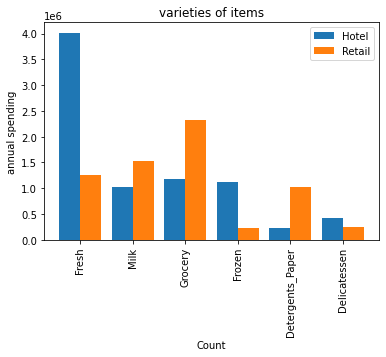

In [30]:
X = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
Y = [4015717,1028614,1180717,1116979,235587,421955]
Z = [1264414,1521743,2317845,234671,1032270,248988]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Hotel')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Retail')

plt.xticks(X_axis, X)
plt.xticks(rotation = 90)
plt.xlabel("Count")
plt.ylabel("annual spending")

plt.title("varieties of items")

  

plt.legend()
plt.show()

In [31]:
new_index=['Lisbon','Oporto','Other']
df_Region=df.groupby("Region").sum().reset_index().T
df_Region




,0,1,2
Region,Lisbon,Oporto,Other
Buyer/Spender,18095,14899,64026
Fresh,854833,464721,3960577
Milk,422454,239144,1888759
Grocery,570037,433274,2495251
Frozen,231026,190132,930492
Detergents_Paper,204136,173311,890410
Delicatessen,104327,54506,512110
Total expenses,2386813,1555088,10677599


In [32]:
df_Region.columns=new_index
df_Region
df_Region = df_Region.iloc[2:8]
df_Region
df_Region2= pd.DataFrame(df_Region.reset_index())
df_Region2

,index,Lisbon,Oporto,Other
0,Fresh,854833,464721,3960577
1,Milk,422454,239144,1888759
2,Grocery,570037,433274,2495251
3,Frozen,231026,190132,930492
4,Detergents_Paper,204136,173311,890410
5,Delicatessen,104327,54506,512110


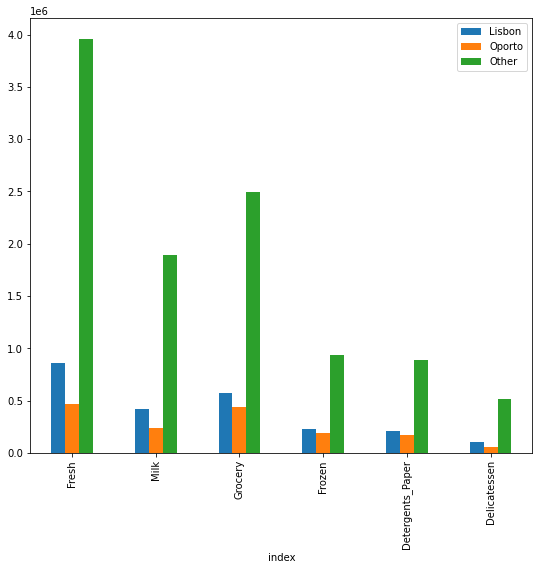

In [33]:
df_Region2.plot(x="index", y=["Lisbon", "Oporto","Other"], kind="bar",figsize=(9,8))
plt.show()

In [34]:
df_reg=df.groupby('Region').sum().reset_index()
df_reg

,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total expenses
0,Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
2,Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


In [35]:
df_reg1=df_reg.drop('Buyer/Spender',axis=1)

In [36]:
df_reg2=df_reg1.drop('Total expenses',axis=1)
df_reg2


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,854833,422454,570037,231026,204136,104327
1,Oporto,464721,239144,433274,190132,173311,54506
2,Other,3960577,1888759,2495251,930492,890410,512110


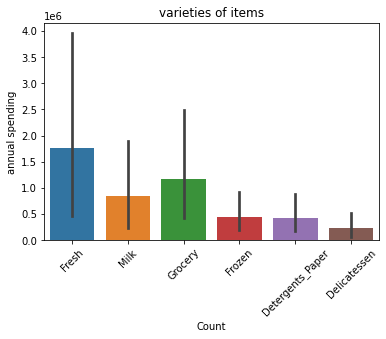

In [37]:
sns.barplot(data=df_reg2);
plt.xticks(rotation=45)
plt.xlabel("Count")
plt.ylabel("annual spending")

plt.title("varieties of items")

plt.show()


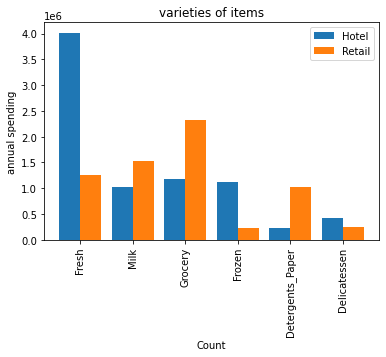

In [38]:
X = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
L = [854833,422454,570037,231026,204136,104327]
Op = [464721,239144,433274,190132,173311,54506]
Ot = [3960577,1888759,2495251,930492,890410,512110]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Hotel')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Retail')

plt.xticks(X_axis, X)
plt.xticks(rotation = 90)
plt.xlabel("Count")
plt.ylabel("annual spending")

plt.title("varieties of items")

  

plt.legend()
plt.show()

In [39]:
df_reg2

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,854833,422454,570037,231026,204136,104327
1,Oporto,464721,239144,433274,190132,173311,54506
2,Other,3960577,1888759,2495251,930492,890410,512110


# 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [40]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total expenses
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [41]:
df
df_items=df[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"]]
df_items

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [42]:
df_items2=df_items.describe().T.reset_index()
df_items2

,index,count,mean,std,min,25%,50%,75%,max
0,Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
1,Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
2,Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
3,Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
4,Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
5,Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [43]:
df_items3=df_items2[["index","std","mean"]]
df_items3
df_items3["variance"]=df_items3["std"]/df_items3["mean"]
df_items3

C:\Users\vivek\AppData\Local\Temp/ipykernel_14032/1762470320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items3["variance"]=df_items3["std"]/df_items3["mean"]


,index,std,mean,variance
0,Fresh,12647.328865,12000.297727,1.053918
1,Milk,7380.377175,5796.265909,1.273299
2,Grocery,9503.162829,7951.277273,1.195174
3,Frozen,4854.673333,3071.931818,1.580332
4,Detergents_Paper,4767.854448,2881.493182,1.654647
5,Delicatessen,2820.105937,1524.870455,1.849407


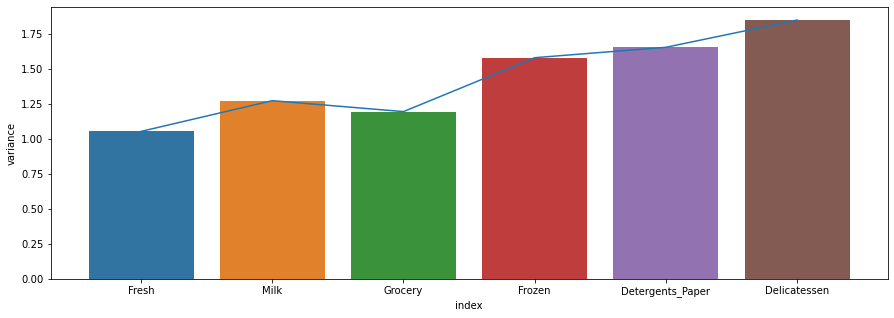

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_items3,x='index',y='variance');
sns.lineplot(data=df_items3,x='index',y='variance');

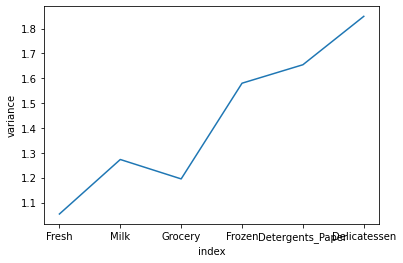

In [45]:
sns.lineplot(data=df_items3,x='index',y='variance');


# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

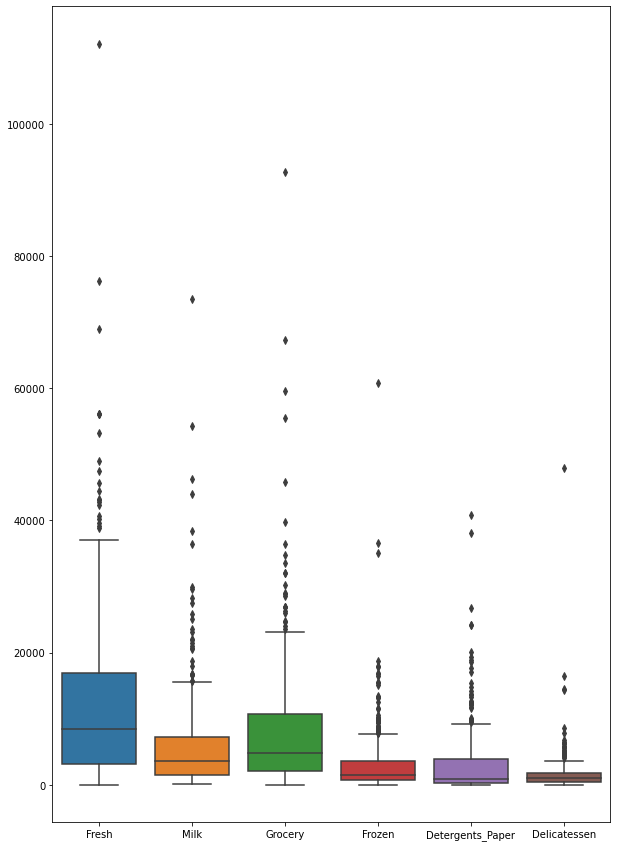

In [46]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df_items);

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

In [47]:
#  write all the inputs from the above analysis...

# Problem 2 - (Download Data)

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

## First step is to import the data and do the exploratory data analysis

In [48]:
stu=pd.read_csv('Survey.csv')

In [49]:
stu

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [50]:
stu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [51]:
stu.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [52]:
stu.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [53]:
stu.dtypes

ID                     int64
Gender                object
Age                    int64
Class                 object
Major                 object
Grad Intention        object
GPA                  float64
Employment            object
Salary               float64
Social Networking      int64
Satisfaction           int64
Spending               int64
Computer              object
Text Messages          int64
dtype: object

In [54]:
stu.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

## 2.1.1. Gender and Major

In [55]:
stu_major=pd.crosstab(stu['Gender'],stu['Major'],margins=False).reset_index()
stu_major

Major,Gender,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
0,Female,3,3,7,4,4,3,9,0
1,Male,4,1,4,2,6,4,5,3


## 2.1.2. Gender and Grad Intention

In [56]:
stu_grad=pd.crosstab(stu['Gender'],stu['Grad Intention'],margins=False).reset_index()
stu_grad

Grad Intention,Gender,No,Undecided,Yes
0,Female,9,13,11
1,Male,3,9,17


## 2.1.3. Gender and Employment

In [57]:
stu_emp=pd.crosstab(stu['Gender'],stu['Employment'],margins=False).reset_index()
stu_emp

Employment,Gender,Full-Time,Part-Time,Unemployed
0,Female,3,24,6
1,Male,7,19,3


## 2.1.4. Gender and Computer

In [58]:
stu_comp=pd.crosstab(stu['Gender'],stu['Computer'],margins=False).reset_index()
stu_comp

Computer,Gender,Desktop,Laptop,Tablet
0,Female,2,29,2
1,Male,3,26,0


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [59]:
print(stu['Gender'].count())

62


In [60]:
stu.groupby('Gender').count().reset_index()

,Gender,ID,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,Female,33,33,33,33,33,33,33,33,33,33,33,33,33
1,Male,29,29,29,29,29,29,29,29,29,29,29,29,29


In [61]:
print('The probability that a random selected CMSU student will be a male is',29/62)

The probability that a random selected CMSU student will be a male is 0.46774193548387094


## 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [62]:
print('The probability that a random selected CMSU student will be a female is',33/62)

The probability that a random selected CMSU student will be a female is 0.532258064516129


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [63]:
stu_major

Major,Gender,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
0,Female,3,3,7,4,4,3,9,0
1,Male,4,1,4,2,6,4,5,3


In [150]:
print('The probability that a random selected CMSU student will be a Accounting major and a male is',((4/62)/(29/62)))

The probability that a random selected CMSU student will be a Accounting major and a male is 0.13793103448275862


In [151]:
print('The probability that a random selected CMSU student will be a CIS major and a male is',((1/62)/(29/62)))

The probability that a random selected CMSU student will be a CIS major and a male is 0.034482758620689655


In [152]:
print('The probability that a random selected CMSU student will be a Economics/Finance major and a male is',((4/62)/(29/62)))

The probability that a random selected CMSU student will be a Economics/Finance major and a male is 0.13793103448275862


In [153]:
print('The probability that a random selected CMSU student will be a International Business major and a male is',((2/62)/(29/62)))

The probability that a random selected CMSU student will be a International Business major and a male is 0.06896551724137931


In [154]:
print('The probability that a random selected CMSU student will be a Management major and a male is',((6/62)/(29/62)))

The probability that a random selected CMSU student will be a Management major and a male is 0.20689655172413793


In [155]:
print('The probability that a random selected CMSU student will be a Other major and a male is',((4/62)/(29/62)))

The probability that a random selected CMSU student will be a Other major and a male is 0.13793103448275862


In [156]:
print('The probability that a random selected CMSU student will be a Retailing/Marketing major and a male is',((5/62)/(29/62)))

The probability that a random selected CMSU student will be a Retailing/Marketing major and a male is 0.1724137931034483


In [157]:
print('The probability that a random selected CMSU student will be a Undecided major and a male is',((3/62)/(29/62)))

The probability that a random selected CMSU student will be a Undecided major and a male is 0.10344827586206896


## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [135]:
stu_major

Major,Gender,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
0,Female,3,3,7,4,4,3,9,0,17
1,Male,4,1,4,2,6,4,5,3,11


In [158]:
print('The probability that a random selected CMSU student will be a Accounting major and a female is',((3/62)/(33/62)))

The probability that a random selected CMSU student will be a Accounting major and a female is 0.09090909090909091


In [159]:
print('The probability that a random selected CMSU student will be a CIS major and a female is',((3/62)/(33/62)))

The probability that a random selected CMSU student will be a CIS major and a female is 0.09090909090909091


In [160]:
print('The probability that a random selected CMSU student will be a Economics/Finance major and a female is',((7/62)/(33/62)))

The probability that a random selected CMSU student will be a Economics/Finance major and a female is 0.21212121212121213


In [161]:
print('The probability that a random selected CMSU student will be a International Business major and a female is',((4/62)/(33/62)))

The probability that a random selected CMSU student will be a International Business major and a female is 0.12121212121212122


In [162]:
print('The probability that a random selected CMSU student will be a Management major and a female is',((4/62)/(33/62)))

The probability that a random selected CMSU student will be a Management major and a female is 0.12121212121212122


In [163]:
print('The probability that a random selected CMSU student will be a Other major and a female is',((3/62)/(33/62)))

The probability that a random selected CMSU student will be a Other major and a female is 0.09090909090909091


In [164]:
print('The probability that a random selected CMSU student will be a Retailing/Marketing major and a female is',((9/62)/(33/62)))

The probability that a random selected CMSU student will be a Retailing/Marketing major and a female is 0.27272727272727276


In [165]:
print('The probability that a random selected CMSU student will be a Undecided major and a female is',((0/62)/(33/62)))

The probability that a random selected CMSU student will be a Undecided major and a female is 0.0


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [80]:
stu_grad

Grad Intention,Gender,No,Undecided,Yes
0,Female,9,13,11
1,Male,3,9,17


In [166]:
print('The probability That a randomly chosen student is a male and intends to graduate is',((17/62)/(29/62)))

The probability That a randomly chosen student is a male and intends to graduate is 0.5862068965517241


## 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [82]:
stu_comp

Computer,Gender,Desktop,Laptop,Tablet
0,Female,2,29,2
1,Male,3,26,0


In [167]:
print('The probability that a randomly selected student is a female and does NOT have a laptop is',((4/62)/(33/62)))

The probability that a randomly selected student is a female and does NOT have a laptop is 0.12121212121212122


## 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

In [84]:
stu_emp

Employment,Gender,Full-Time,Part-Time,Unemployed
0,Female,3,24,6
1,Male,7,19,3


In [85]:
PM=0.46774193548387094

In [86]:
PF=10/62
PF

0.16129032258064516

In [87]:
PMF=7/62
PMF

0.11290322580645161

In [88]:
PM_F=(PM+PF-PMF)
PM_F

0.5161290322580645

In [89]:
print('The probability that a randomly chosen student is a male or has a full-time employment is',PM_F)

The probability that a randomly chosen student is a male or has a full-time employment is 0.5161290322580645


## 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management

In [91]:
stu_major

Major,Gender,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
0,Female,3,3,7,4,4,3,9,0
1,Male,4,1,4,2,6,4,5,3


In [168]:
F=33/62
F

0.532258064516129

In [169]:
I=6/62
I

0.0967741935483871

In [170]:
FI=4/62
FI

0.06451612903225806

In [171]:
M=10/62
M

0.16129032258064516

In [174]:
FM=4/62
FM

0.06451612903225806

In [177]:
I_F=FI/F
I_F

0.12121212121212122

In [173]:
print('The probability that a randomly chosen student is majoring in International business given she is a female is',(FI/F))

The probability that a randomly chosen student is majoring in International business given she is a female is 0.12121212121212122


In [178]:
M_F=FM/F
M_F

0.12121212121212122

In [175]:
print('The probability that a randomly chosen student is majoring in Management given she is a female is',(FM/F))

The probability that a randomly chosen student is majoring in Management given she is a female is 0.12121212121212122


In [181]:
print('The probability that a randomly chosen student is majoring in International business or Management given she is a female is',(I_F+M_F))

The probability that a randomly chosen student is majoring in International business or Management given she is a female is 0.24242424242424243


## 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [182]:
stu_grad

Grad Intention,Gender,No,Undecided,Yes
0,Female,9,13,11
1,Male,3,9,17


In [187]:
stu_grad1=stu_grad.drop('Undecided',axis=1)
stu_grad1

Grad Intention,Gender,No,Yes
0,Female,9,11
1,Male,3,17


In [190]:
stu_grad1.sum()

Grad Intention
Gender    FemaleMale
No                12
Yes               28
dtype: object

In [192]:
print('Probability of graduate intention is', 28/40)

Probability of graduate intention is 0.7


In [193]:
print('Probability of graduate intention being female is',((11/40)/(20/40)))

Probability of graduate intention being female is 0.55


## 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

## 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [210]:
stu_var=stu[['GPA','Salary','Spending','Text Messages']]
stu_var

,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100
...,...,...,...,...
57,2.4,40.0,1000,10
58,2.9,40.0,350,250
59,2.5,55.0,500,500
60,3.5,30.0,490,50


In [212]:
stu_var1=stu_var[stu_var['GPA']<3]
stu_var1['GPA'].count()

17

In [213]:
print('Probability that if a student is chosen randomly his/her GPA is less than 3 is',17/62 )

Probability that if a student is chosen randomly his/her GPA is less than 3 is 0.27419354838709675


## 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [215]:
stu_sal=pd.crosstab(stu['Gender'],stu['Salary'],margins=False).reset_index()

In [216]:
stu_sal

Salary,Gender,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
0,Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
1,Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [219]:
print('Probability that if  randomly selected male earns 50 or more is',((10/62)/(29/62)))

Probability that if  randomly selected male earns 50 or more is 0.3448275862068966


## 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

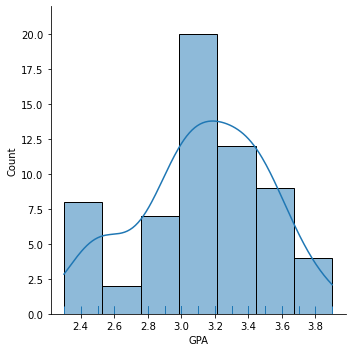

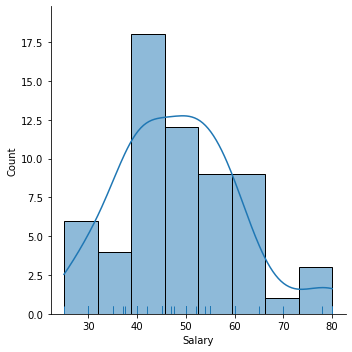

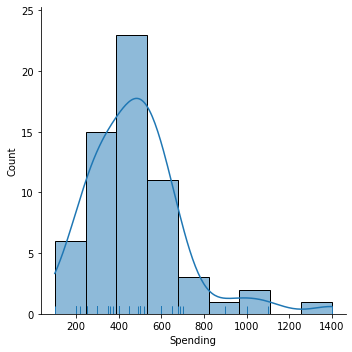

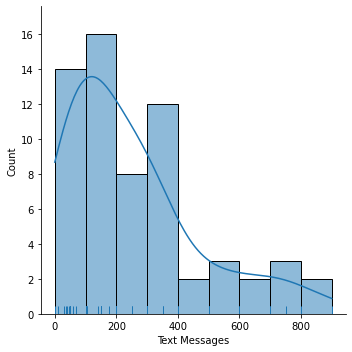

In [236]:
sns.displot(stu['GPA'], kde=True, rug=True);
sns.displot(stu['Salary'], kde=True, rug=True);
sns.displot(stu['Spending'], kde=True, rug=True);
sns.displot(stu['Text Messages'], kde=True, rug=True);

In [237]:
print('As we can see GPA and salary are normally distributed but spending and Text messages are not normally distributed')

As we can see GPA and salary are normally distributed but spending and Text messages are not normally distributed


## 2.8.2 Write a note summarizing your conclusions

## Problem 3 (Download Data)

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

## First step is to import the data and do the exploratory data analysis

In [239]:
abc=pd.read_csv('A+%26+B+shingles.csv')
abc.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [240]:
abc.tail()

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


In [261]:
abc1=abc.dropna()
abc1

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [260]:
from scipy.stats import  chi2_contingency

In [267]:
from scipy.stats           import ttest_1samp,ttest_ind

In [276]:
t_statistic,p_value=ttest_1samp(abc['A'],0.35)

In [278]:
p_value/2

0.07477633144907513

In [273]:
p_value=0.07477633144907513

In [280]:
alpha_value=0.05
print('Level of significance: %2f' %alpha_value)
if p_value < alpha_value:
    print('we have evidence to reject the null hypothseis since p_value < Level of significance')
else:
    print('we have no evidence to reject the null hypothesis since p_value > Level of significance')
print('our one sample t_test value=',p_value/2)

Level of significance: 0.050000
we have no evidence to reject the null hypothesis since p_value > Level of significance
our one sample t_test value= 0.07477633144907513


In [283]:
t_statistic,p_value=ttest_1samp(abc1['B'],0.35)

In [284]:
p_value

0.004180954800638363

In [285]:
p_value/2

0.0020904774003191813

In [286]:
alpha_value=0.05
print('Level of significance: %2f' %alpha_value)
if p_value < alpha_value:
    print('we have evidence to reject the null hypothseis since p_value < Level of significance')
else:
    print('we have no evidence to reject the null hypothesis since p_value > Level of significance')
print('our one sample t_test value=',p_value/2)

Level of significance: 0.050000
we have evidence to reject the null hypothseis since p_value < Level of significance
our one sample t_test value= 0.0020904774003191813


## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [288]:
t_statistic,p_value=ttest_ind(abc['A'],abc['B'],equal_var=True,nan_policy='omit')
print('tstat',t_statistic)
print('p_value',p_value)

tstat 1.2896282719661123
p_value 0.2017496571835306


In [289]:
alpha_value=0.05
print('Level of significance: %2f' %alpha_value)
if p_value < alpha_value:
    print('we have evidence to reject the null hypothseis since p_value < Level of significance')
else:
    print('we have no evidence to reject the null hypothesis since p_value > Level of significance')
print('our one sample t_test value=',p_value)

Level of significance: 0.050000
we have no evidence to reject the null hypothesis since p_value > Level of significance
our one sample t_test value= 0.2017496571835306
